Dataset Overview:
Shape: (54255, 10)

First 5 rows:
  Country Code City           Location            Coordinates Pollutant  \
0           JP  NaN  北九州市小倉北区大門一丁目６－４８  33.880833, 130.873056        NO   
1           JP  NaN   北九州市若松区本町三丁目１３－１      33.898056, 130.81       NO2   
2           JP  NaN   北九州市門司区大里原町１２－１２  33.895833, 130.935833       NOX   
3           JP  NaN          千歳市若草４－１３     42.786944, 141.605       NO2   
4           JP  NaN    千葉市稲毛区宮野木町９９６－９  35.653889, 140.097778       NOX   

      Source Name Unit  Value               Last Updated Country Label  
0  japan-soramame  ppm  0.002  2024-03-10T13:30:00+05:30         Japan  
1  japan-soramame  ppm  0.005  2024-03-10T13:30:00+05:30         Japan  
2  japan-soramame  ppm  0.013  2024-03-10T13:30:00+05:30         Japan  
3  japan-soramame  ppm  0.004  2024-03-10T13:30:00+05:30         Japan  
4  japan-soramame  ppm  0.003  2024-03-10T13:30:00+05:30         Japan  

Columns:
['Country Code', 'City', 'Location', 'Coordinates

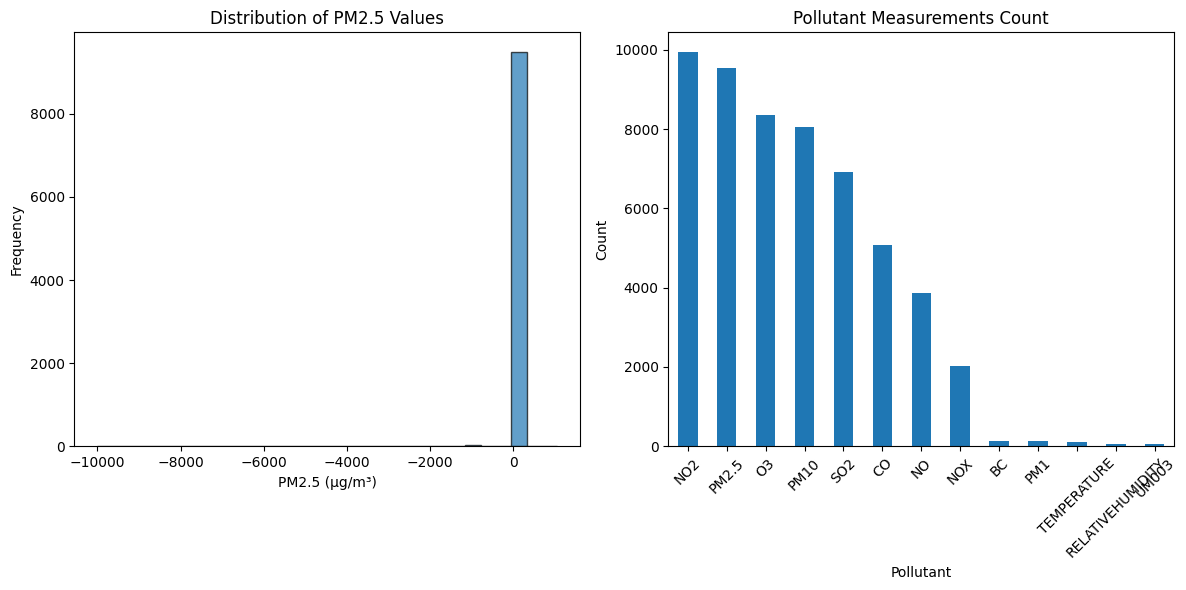


Average pollution values by country:
Country Label
Turkey                                    18090.975487
Cyprus                                      517.706796
Peru                                        438.956971
Senegal                                     363.791947
Thailand                                    310.113155
India                                       297.150417
Indonesia                                   288.357847
Singapore                                   282.900000
Macedonia, The former Yugoslav Rep. of      218.423639
Saudi Arabia                                213.981333
Name: Value, dtype: float64

Date range: 2014-03-13 17:30:00+05:30 to 2024-03-25 14:30:00+05:30

Data sources:
Source Name
ChinaAQIData      10974
AirNow             7376
japan-soramame     6268
EEA Spain          2939
EEA France         2495
EEA Germany        2225
caaqm              2190
EEA Italy          1696
South Africa       1629
Turkiye            1584
Name: count, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Read the CSV data
df = pd.read_csv('world_air_quality.csv', delimiter=';')

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nColumns:")
print(df.columns.tolist())
print("\nBasic info:")
print(df.info())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic statistics for numerical columns
print("\nBasic statistics:")
print(df.describe())

# Analyze by country
print("\nCountries in dataset:")
print(df['Country Label'].value_counts())

# Analyze pollutants
print("\nPollutants in dataset:")
print(df['Pollutant'].value_counts())

# Example: Top 10 highest PM2.5 readings
pm25_data = df[df['Pollutant'] == 'PM2.5'].sort_values('Value', ascending=False)
print("\nTop 10 highest PM2.5 readings:")
print(pm25_data[['Country Label', 'City', 'Location', 'Value', 'Unit']].head(10))

# Example: Analyze Japan data specifically
japan_data = df[df['Country Label'] == 'Japan']
print(f"\nJapan data shape: {japan_data.shape}")
print("Pollutants in Japan:")
print(japan_data['Pollutant'].value_counts())

# Visualization 1: Distribution of PM2.5 values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
pm25_values = df[df['Pollutant'] == 'PM2.5']['Value']
plt.hist(pm25_values.dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frequency')
plt.title('Distribution of PM2.5 Values')

# Visualization 2: Top pollutants by count
plt.subplot(1, 2, 2)
pollutant_counts = df['Pollutant'].value_counts()
pollutant_counts.plot(kind='bar')
plt.title('Pollutant Measurements Count')
plt.xlabel('Pollutant')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Country-wise analysis
country_pollution = df.groupby('Country Label')['Value'].mean().sort_values(ascending=False)
print("\nAverage pollution values by country:")
print(country_pollution.head(10))

# Convert Last Updated to datetime and analyze temporal patterns
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
print(f"\nDate range: {df['Last Updated'].min()} to {df['Last Updated'].max()}")

# Analyze by data source
print("\nData sources:")
print(df['Source Name'].value_counts().head(10))

In [3]:

df.head()

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,JP,NaN,北九州市小倉北区大門一丁目６－４８,"33.880833, 130.873056",NO,japan-soramame,ppm,0.002,2024-03-10 13:30:00+05:30,Japan
1,JP,NaN,北九州市若松区本町三丁目１３－１,"33.898056, 130.81",NO2,japan-soramame,ppm,0.005,2024-03-10 13:30:00+05:30,Japan
2,JP,NaN,北九州市門司区大里原町１２－１２,"33.895833, 130.935833",NOX,japan-soramame,ppm,0.013,2024-03-10 13:30:00+05:30,Japan
3,JP,NaN,千歳市若草４－１３,"42.786944, 141.605",NO2,japan-soramame,ppm,0.004,2024-03-10 13:30:00+05:30,Japan
4,JP,NaN,千葉市稲毛区宮野木町９９６－９,"35.653889, 140.097778",NOX,japan-soramame,ppm,0.003,2024-03-10 13:30:00+05:30,Japan


Dataset loaded successfully!
Shape: (54255, 10)
Countries: 118
Pollutants: ['NO', 'NO2', 'NOX', 'SO2', 'PM2.5', 'CO', 'O3', 'PM10', 'PM1', 'TEMPERATURE', 'UM003', 'BC', 'RELATIVEHUMIDITY']


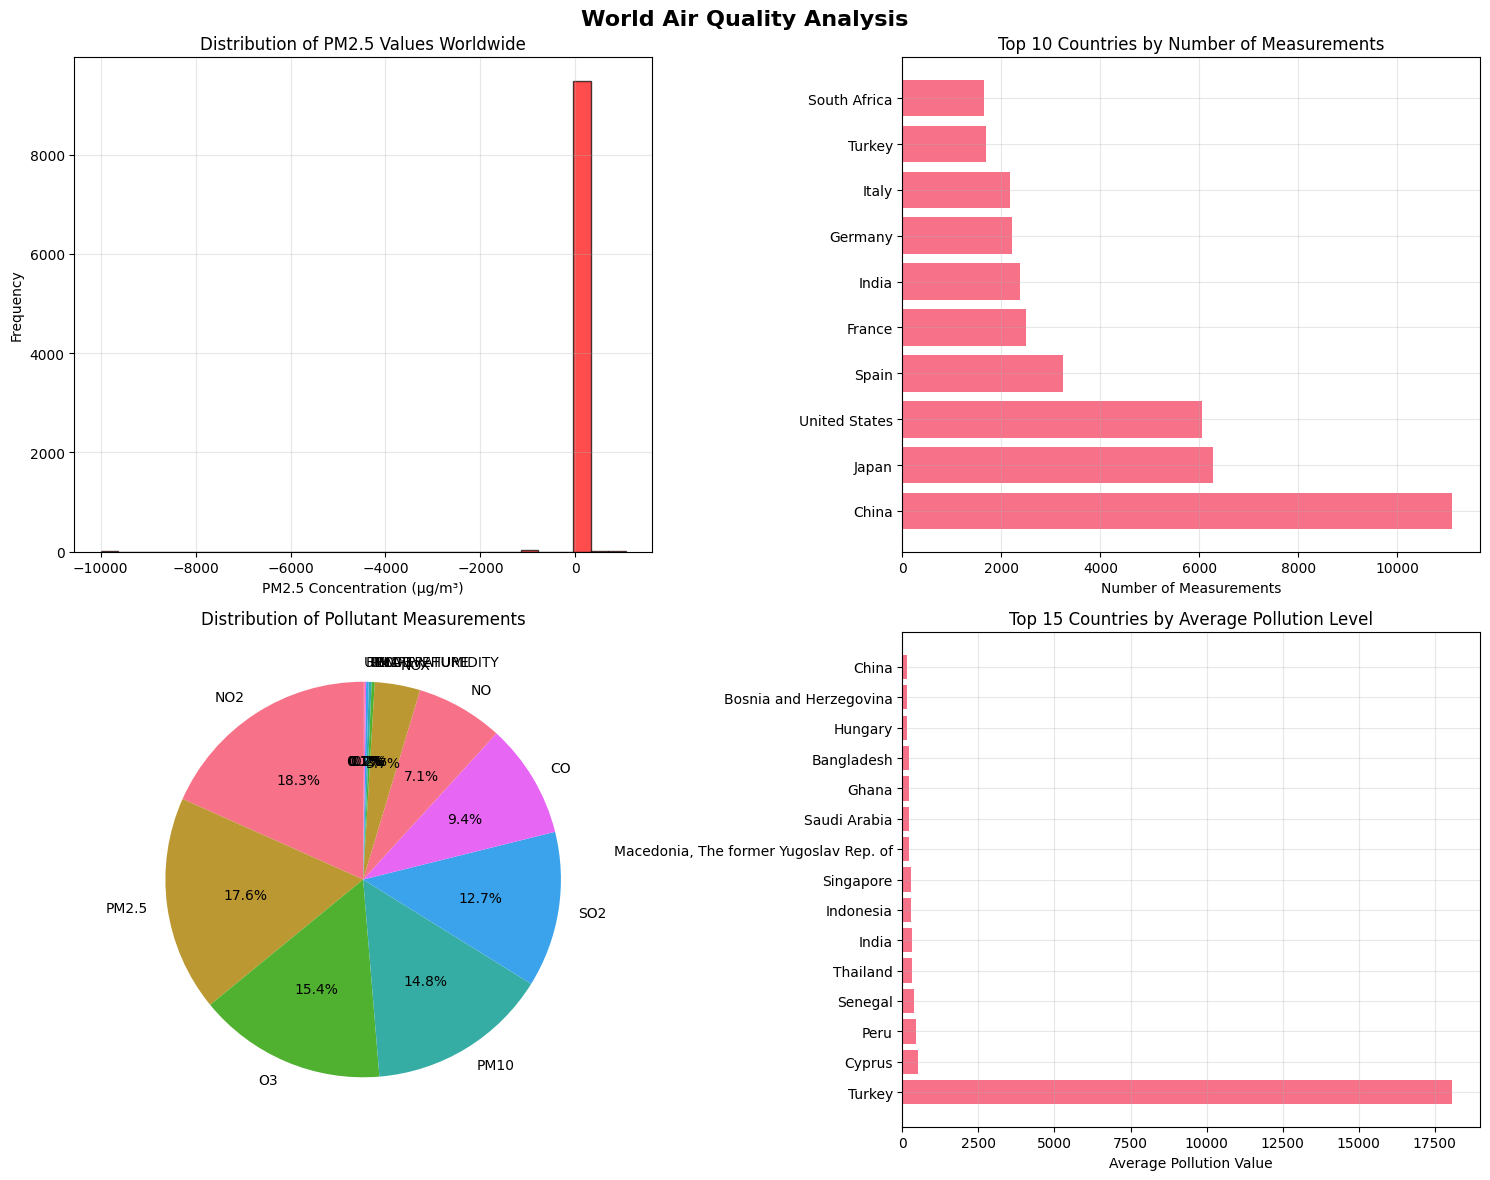

C:\Users\Amr\AppData\Local\Temp\ipykernel_14548\1456786417.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes2[0, 1].boxplot(pollutant_data, labels=pollutant_labels)
C:\Users\Amr\AppData\Local\Temp\ipykernel_14548\1456786417.py:95: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = df['Last Updated'].dt.to_period('M').value_counts().sort_index().tail(12)


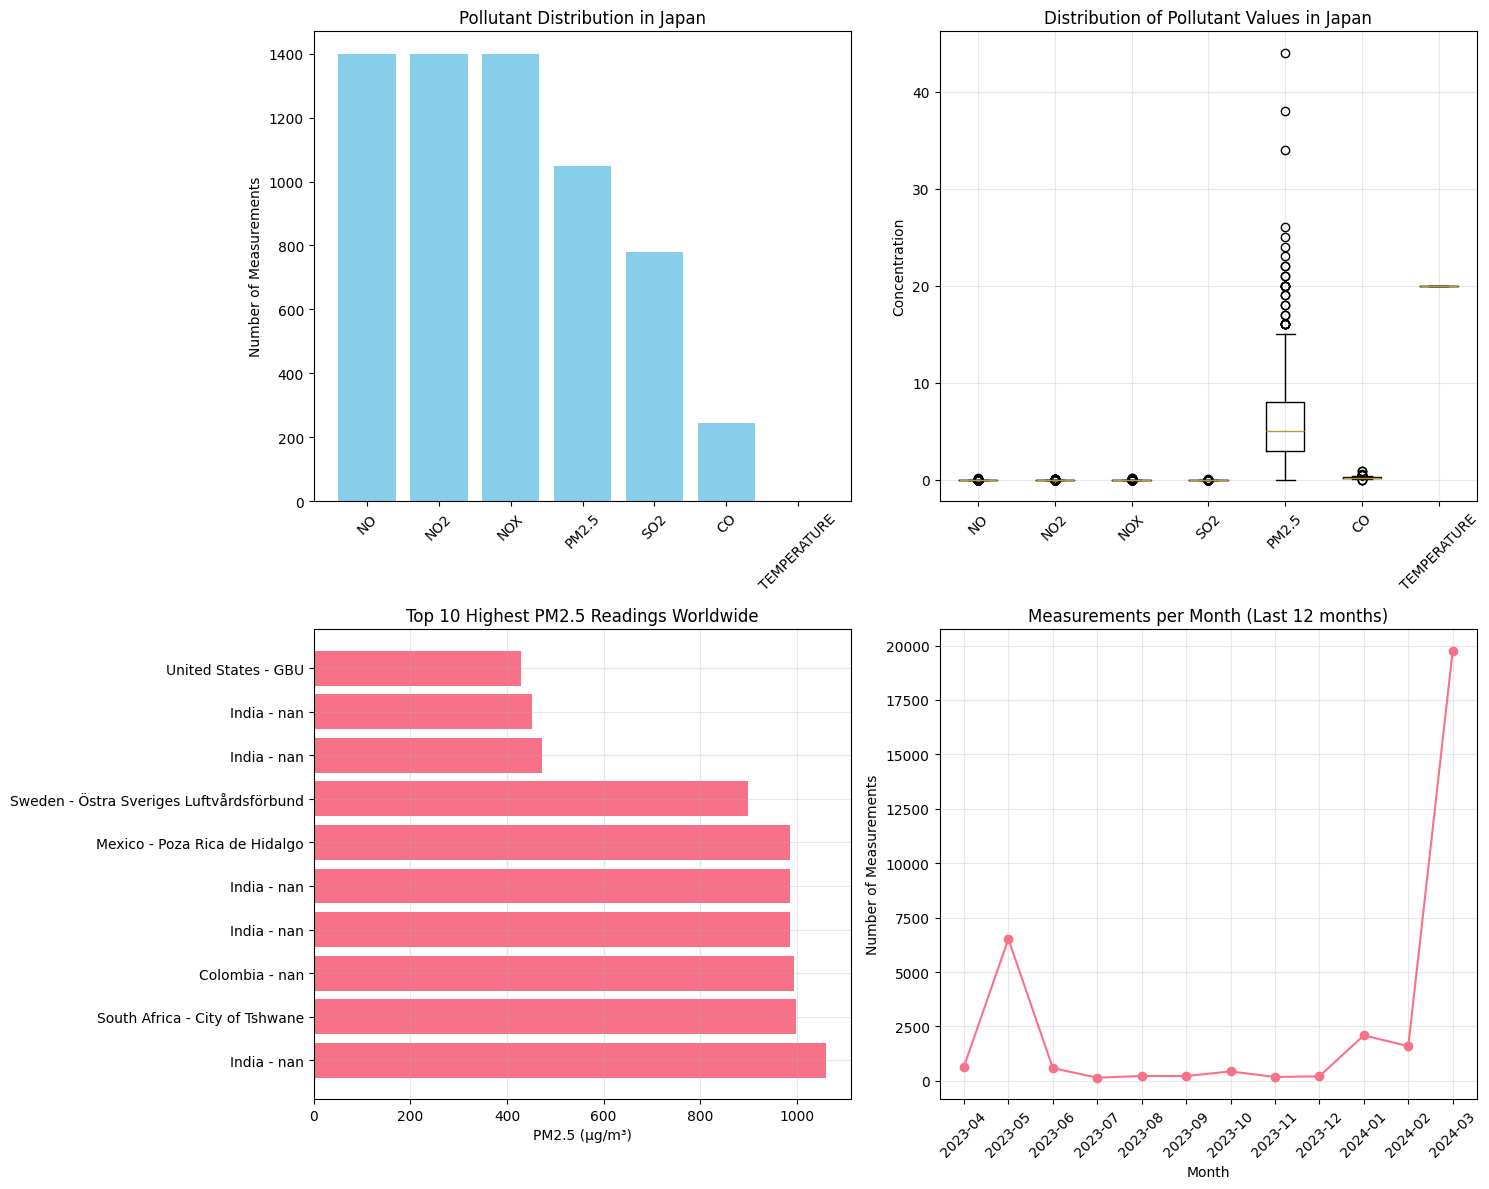


KEY FINDINGS:

Top 5 Most Polluted Locations (PM2.5):
- 1060.0 µg/m³ in N/A, India
- 997.71 µg/m³ in City of Tshwane, South Africa
- 995.0 µg/m³ in N/A, Colombia
- 985.0 µg/m³ in N/A, India
- 985.0 µg/m³ in N/A, India

Country with most measurements: China (11115 records)
Most measured pollutant: NO2

PM2.5 Statistics:
  Global average: 6.91 µg/m³
  Maximum: 1060.00 µg/m³
  Minimum: -9999.00 µg/m³
  Standard deviation: 298.44 µg/m³


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Read the CSV data
df = pd.read_csv('world_air_quality.csv', delimiter=';')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Countries: {df['Country Label'].nunique()}")
print(f"Pollutants: {df['Pollutant'].unique().tolist()}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('World Air Quality Analysis', fontsize=16, fontweight='bold')

# 1. Distribution of PM2.5 values worldwide
pm25_data = df[df['Pollutant'] == 'PM2.5']
axes[0, 0].hist(pm25_data['Value'].dropna(), bins=30, alpha=0.7, color='red', edgecolor='black')
axes[0, 0].set_xlabel('PM2.5 Concentration (µg/m³)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of PM2.5 Values Worldwide')
axes[0, 0].grid(True, alpha=0.3)

# 2. Top 10 countries by number of measurements
country_counts = df['Country Label'].value_counts().head(10)
axes[0, 1].barh(range(len(country_counts)), country_counts.values)
axes[0, 1].set_yticks(range(len(country_counts)))
axes[0, 1].set_yticklabels(country_counts.index)
axes[0, 1].set_xlabel('Number of Measurements')
axes[0, 1].set_title('Top 10 Countries by Number of Measurements')
axes[0, 1].grid(True, alpha=0.3)

# 3. Pollutant distribution
pollutant_counts = df['Pollutant'].value_counts()
axes[1, 0].pie(pollutant_counts.values, labels=pollutant_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Distribution of Pollutant Measurements')

# 4. Average pollution by country (top 15)
country_avg = df.groupby('Country Label')['Value'].mean().sort_values(ascending=False).head(15)
axes[1, 1].barh(range(len(country_avg)), country_avg.values)
axes[1, 1].set_yticks(range(len(country_avg)))
axes[1, 1].set_yticklabels(country_avg.index)
axes[1, 1].set_xlabel('Average Pollution Value')
axes[1, 1].set_title('Top 15 Countries by Average Pollution Level')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Second set of visualizations - Detailed analysis
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 12))

# 5. Japan-specific analysis (since it has the most data)
japan_data = df[df['Country Label'] == 'Japan']
japan_pollutants = japan_data['Pollutant'].value_counts()

axes2[0, 0].bar(japan_pollutants.index, japan_pollutants.values, color='skyblue')
axes2[0, 0].set_title('Pollutant Distribution in Japan')
axes2[0, 0].set_ylabel('Number of Measurements')
axes2[0, 0].tick_params(axis='x', rotation=45)

# 6. Box plot of different pollutants in Japan
pollutant_data = []
pollutant_labels = []
for pollutant in japan_data['Pollutant'].unique():
    values = japan_data[japan_data['Pollutant'] == pollutant]['Value']
    if len(values) > 0:
        pollutant_data.append(values)
        pollutant_labels.append(pollutant)

axes2[0, 1].boxplot(pollutant_data, labels=pollutant_labels)
axes2[0, 1].set_title('Distribution of Pollutant Values in Japan')
axes2[0, 1].set_ylabel('Concentration')
axes2[0, 1].tick_params(axis='x', rotation=45)
axes2[0, 1].grid(True, alpha=0.3)

# 7. Top 10 highest PM2.5 readings worldwide
top_pm25 = df[df['Pollutant'] == 'PM2.5'].nlargest(10, 'Value')[['Country Label', 'City', 'Value']]
axes2[1, 0].barh(range(len(top_pm25)), top_pm25['Value'])
axes2[1, 0].set_yticks(range(len(top_pm25)))
axes2[1, 0].set_yticklabels([f"{row['Country Label']} - {row['City']}" for _, row in top_pm25.iterrows()])
axes2[1, 0].set_xlabel('PM2.5 (µg/m³)')
axes2[1, 0].set_title('Top 10 Highest PM2.5 Readings Worldwide')
axes2[1, 0].grid(True, alpha=0.3)

# 8. Temporal analysis (if dates are available)
try:
    df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
    monthly_counts = df['Last Updated'].dt.to_period('M').value_counts().sort_index().tail(12)
    axes2[1, 1].plot(range(len(monthly_counts)), monthly_counts.values, marker='o')
    axes2[1, 1].set_xticks(range(len(monthly_counts)))
    axes2[1, 1].set_xticklabels([str(period) for period in monthly_counts.index], rotation=45)
    axes2[1, 1].set_xlabel('Month')
    axes2[1, 1].set_ylabel('Number of Measurements')
    axes2[1, 1].set_title('Measurements per Month (Last 12 months)')
    axes2[1, 1].grid(True, alpha=0.3)
except:
    axes2[1, 1].text(0.5, 0.5, 'Date analysis not available', ha='center', va='center', transform=axes2[1, 1].transAxes)
    axes2[1, 1].set_title('Temporal Analysis')

plt.tight_layout()
plt.show()

# Print some key findings
print("\n" + "="*50)
print("KEY FINDINGS:")
print("="*50)

# Top polluted locations
print("\nTop 5 Most Polluted Locations (PM2.5):")
top_polluted = df[df['Pollutant'] == 'PM2.5'].nlargest(5, 'Value')
for _, row in top_polluted.iterrows():
    print(f"- {row['Value']} µg/m³ in {row['City'] if pd.notna(row['City']) else 'N/A'}, {row['Country Label']}")

# Country with most data
print(f"\nCountry with most measurements: {df['Country Label'].value_counts().index[0]} ({df['Country Label'].value_counts().iloc[0]} records)")

# Most common pollutant
print(f"Most measured pollutant: {df['Pollutant'].value_counts().index[0]}")

# Summary statistics for PM2.5
if not pm25_data.empty:
    print(f"\nPM2.5 Statistics:")
    print(f"  Global average: {pm25_data['Value'].mean():.2f} µg/m³")
    print(f"  Maximum: {pm25_data['Value'].max():.2f} µg/m³")
    print(f"  Minimum: {pm25_data['Value'].min():.2f} µg/m³")
    print(f"  Standard deviation: {pm25_data['Value'].std():.2f} µg/m³")